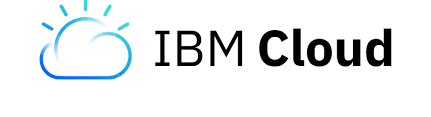

# Watson Visual Recognition Tutorial

This is a short tutorial that ensures that exposes you to several aspect of the Watson Visual Recognition service.  We highly encourage you to visit the links provided throughout to further your understanding of the additional capabilities that Watson Visual Recognition has to offer.

* [Watson Visual Recognition docs](https://cloud.ibm.com/apidocs/visual-recognition/visual-recognition-v4)
* [Watson Visual Recognition overview](https://cloud.ibm.com/docs/services/visual-recognition?topic=visual-recognition-object-detection-overview)
* [Watson Visual Recognition best practices](https://developer.ibm.com/articles/cc-build-with-watson-tips-best-practices-custom-classifiers-visual-recognition/)

If you have not already carried out instructions that proceeded this tutorial please do so now.  You should have

1. Installed the [Watson Developer Cloud Python software SDK](https://github.com/watson-developer-cloud)
2. Created a `visual recognition` resource in the [IBM Cloud](https://cloud.ibm.com)
3. Saved the url, API key, and version associated with your resource in a file located in your home directory.

In [ ]:
import sys
import os
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from ibm_watson import VisualRecognitionV3, VisualRecognitionV4
from ibm_watson.visual_recognition_v4 import FileWithMetadata, TrainingDataObject, Location, AnalyzeEnums
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
%matplotlib inline

If you have saved your key, version and url in the `~/.ibm/ibmauth.py` then the following code block should not raise an exception.  **It is important to be explicit about the version** with every request, because software changes and with APIs the source code is not always readily available.  From the perspective of being able to reproduce your analysis at some point in the future the version is essential.

In [ ]:
### import API key
apikey_dir = os.path.join(os.path.expanduser("~"),".ibm")
sys.path.append(apikey_dir)

if not os.path.exists(apikey_dir):
    raise Exception("please store you API key in file within 'apikey_dir' before proceeding")

from ibmauth import  VR_KEY, VR_URL, VR_VERSION

It is common practice to wrap connection code in a function help ensure clean handling of errors.

In [ ]:
def connect_watson_vr_v3():
    """
    establish a connection to watson visual recognition service (version 3)
    """
    
    authenticator = IAMAuthenticator(VR_KEY)
    service = VisualRecognitionV3(version=VR_VERSION,
                                  authenticator=authenticator)

    service.set_service_url(VR_URL)

    print("\nConnection established.\n")
    return(service)

def connect_watson_vr_v4():
    """
    establish a connection to watson visual recognition service (version 4)
    """
    
    authenticator = IAMAuthenticator(VR_KEY)
    service = VisualRecognitionV4(version=VR_VERSION,
                                  authenticator=authenticator)

    service.set_service_url(VR_URL)

    print("\nConnection established.\n")
    return(service)

In [ ]:
## establish a connection to version 3 the service
service = connect_watson_vr_v3()

The Watson Visual Recognition service can classify images with built-in or custom classifiers.  The next cell will download an example image.  You can download the image directly if you do not have `wget` installed.

In [ ]:
## fetch and example image
!wget -nc https://github.com/watson-developer-cloud/python-sdk/raw/master/resources/car.jpg

In [ ]:
## show the image
fig = plt.figure()
ax = fig.add_subplot(111)
img = mpimg.imread('car.jpg')
imgplot = ax.imshow(img)
plt.axis('off');

In [ ]:
## classify the image from a file
with open('car.jpg', 'rb') as images_file:
    car_results = service.classify(
        images_file=images_file,
        threshold='0.1',
        classifier_ids=['default']).get_result()
print(json.dumps(car_results, indent=2))

### Find an image of an identifiable object and repeat the process.

In [ ]:
with open('./Cats/2183146305_903e904615_z.jpg', 'rb') as images_file:
    car_results = service.classify(
        images_file=images_file,
        threshold='0.1',
        classifier_ids=['default']).get_result()
print(json.dumps(car_results, indent=2))

You may use `classify` directly through a URL as well.  Also note that we are directly specifying which classifier to use rather than using the default.

In [ ]:
## classify an image from a URL
image_url = "https://watson-developer-cloud.github.io/doc-tutorial-downloads/visual-recognition/fruitbowl.jpg"
fruitbowl_results = service.classify(url=image_url,
                                     threshold='0.1',
                                     classifier_ids=['food']).get_result()
print(json.dumps(fruitbowl_results, indent=2))

See the [version 3 of the documentation](https://cloud.ibm.com/apidocs/visual-recognition/visual-recognition-v3) to get an idea of some of the additional parameters.